Analysis on Midmarks

Name : Srimallika

Roll No. : 2211cs010359

Section : Group-4

The MIDMARKS.xlsx dataset contains midterm examination scores for students in the "ALPHA" section of Semester 2, Mid 1. It includes various subject marks for each student, allowing performance evaluation. The dataset consists of several columns: S.NO represents the serial number of students, while SECTION confirms that all students belong to the "ALPHA" section. The academic performance of students is recorded across multiple subjects, including DV (Digital Vision), M-II (Mathematics-II), PP (Programming Principles), BEEE (Basic Electrical and Electronics Engineering), FL (Formal Languages), and FIMS (possibly Financial Information Management Systems or a related subject). Each row in the dataset represents an individual student and their respective marks in these subjects. The dataset can be used for various analyses, such as performance comparisons, pass/fail evaluation, and statistical distribution of scores.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("MIDMARKS.xlsx")
df

S.NO SECTION  DV M-II  PP BEEE  FL FIMS
0     1.0   ALPHA  12    0  17    9  19   15
1     2.0   ALPHA  19   12  16   16  18    3
2     3.0   ALPHA  18   14  18   18  18   16
3     4.0   ALPHA  15    9  19   17  19   15
4     5.0   ALPHA  18   17  19   19  20   18
..    ...     ...  ..  ...  ..  ...  ..  ...
713   NaN    ZETA  19    8   8   19  17   18
714   NaN    ZETA  12    1   7   10  20    8
715   NaN    ZETA  17    6  14   14  17   18
716   NaN    ZETA  12    1   6    7  15   12
717   NaN    ZETA  19   14  17   16  20   19

[718 rows x 8 columns]

In [5]:
df['S.NO'] = range(1,len(df)+1)
df

S.NO SECTION  DV M-II  PP BEEE  FL FIMS
0       1   ALPHA  12    0  17    9  19   15
1       2   ALPHA  19   12  16   16  18    3
2       3   ALPHA  18   14  18   18  18   16
3       4   ALPHA  15    9  19   17  19   15
4       5   ALPHA  18   17  19   19  20   18
..    ...     ...  ..  ...  ..  ...  ..  ...
713   714    ZETA  19    8   8   19  17   18
714   715    ZETA  12    1   7   10  20    8
715   716    ZETA  17    6  14   14  17   18
716   717    ZETA  12    1   6    7  15   12
717   718    ZETA  19   14  17   16  20   19

[718 rows x 8 columns]

 This generates a sequence of numbers starting from 1 up to the length of the DataFrame

In [7]:
df['FL'] = df['FL'].fillna(0) 
df=df.dropna()

In [21]:
df.info

<bound method DataFrame.info of      S.NO SECTION  DV M-II  PP BEEE  FL FIMS
0       1   ALPHA  12    0  17    9  19   15
1       2   ALPHA  19   12  16   16  18    3
2       3   ALPHA  18   14  18   18  18   16
3       4   ALPHA  15    9  19   17  19   15
4       5   ALPHA  18   17  19   19  20   18
..    ...     ...  ..  ...  ..  ...  ..  ...
713   714    ZETA  19    8   8   19  17   18
714   715    ZETA  12    1   7   10  20    8
715   716    ZETA  17    6  14   14  17   18
716   717    ZETA  12    1   6    7  15   12
717   718    ZETA  19   14  17   16  20   19

[690 rows x 8 columns]>

summary of a DataFrame,the number of rows and columns,column names and their data types

In [23]:
df.fillna(0)

S.NO SECTION  DV M-II  PP BEEE  FL FIMS
0       1   ALPHA  12    0  17    9  19   15
1       2   ALPHA  19   12  16   16  18    3
2       3   ALPHA  18   14  18   18  18   16
3       4   ALPHA  15    9  19   17  19   15
4       5   ALPHA  18   17  19   19  20   18
..    ...     ...  ..  ...  ..  ...  ..  ...
713   714    ZETA  19    8   8   19  17   18
714   715    ZETA  12    1   7   10  20    8
715   716    ZETA  17    6  14   14  17   18
716   717    ZETA  12    1   6    7  15   12
717   718    ZETA  19   14  17   16  20   19

[690 rows x 8 columns]

In [56]:
df['Total'] = df['DV'] + df['M-II'] + df['PP'] + df['BEEE'] + df['FL'] + df['FIMS']
df

C:\Users\Admin\AppData\Local\Temp\ipykernel_11900\4288514683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df['DV'] + df['M-II'] + df['PP'] + df['BEEE'] + df['FL'] + df['FIMS']


S.NO SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total
0       1   ALPHA  12     0  17     9  19    15     72
1       2   ALPHA  19    12  16    16  18     3     84
2       3   ALPHA  18    14  18    18  18    16    102
3       4   ALPHA  15     9  19    17  19    15     94
4       5   ALPHA  18    17  19    19  20    18    111
..    ...     ...  ..   ...  ..   ...  ..   ...    ...
713   714    ZETA  19     8   8    19  17    18     89
714   715    ZETA  12     1   7    10  20     8     58
715   716    ZETA  17     6  14    14  17    18     86
716   717    ZETA  12     1   6     7  15    12     53
717   718    ZETA  19    14  17    16  20    19    105

[690 rows x 9 columns]

A new column called Total ,it includes sum of the values from six different columns

In [29]:
passing_mark = 10
delta_section = df[df['SECTION'] == 'DELTA'].copy()  
delta_section.loc[:, 'M-II'] = pd.to_numeric(delta_section['M-II'], errors='coerce')
delta_section.loc[:, 'M-II Result'] = delta_section['M-II'].apply(lambda x: 'Pass' if x >= passing_mark else 'Fail')
delta_mii_pass_fail_counts = delta_section['M-II Result'].value_counts()
print("--- DELTA Section: M-II Pass/Fail Counts ---")
print(delta_mii_pass_fail_counts)

--- DELTA Section: M-II Pass/Fail Counts ---
M-II Result
Pass    45
Fail    45
Name: count, dtype: int64


Returns pass or fail based on a pass marks of 10 of subject M-II

In [33]:
passing_mark = 10
delta_section = df[df['SECTION'] == 'DELTA'].copy()  
delta_section.loc[:, 'BEEE'] = pd.to_numeric(delta_section['BEEE'], errors='coerce')
delta_section.loc[:, 'BEEE Result'] = delta_section['BEEE'].apply(lambda x: 'Pass' if x >= passing_mark else 'Fail')
delta_mii_pass_fail_counts = delta_section['BEEE Result'].value_counts()
print("--- DELTA Section: BEEE Pass/Fail Counts ---")
print(delta_mii_pass_fail_counts)

--- DELTA Section: BEEE Pass/Fail Counts ---
BEEE Result
Fail    46
Pass    44
Name: count, dtype: int64


Returns pass or fail based on a pass marks of 10 of subject BEEE

In [20]:
passing_mark = 10
delta_section = df[df['SECTION'] == 'DELTA'].copy()  
delta_section.loc[:, 'PP'] = pd.to_numeric(delta_section['PP'], errors='coerce')
delta_section.loc[:, 'PP Result'] = delta_section['PP'].apply(lambda x: 'Pass' if x >= passing_mark else 'Fail')
delta_mii_pass_fail_counts = delta_section['PP Result'].value_counts()
print("--- DELTA Section: PP Pass/Fail Counts ---")
print(delta_mii_pass_fail_counts)

--- DELTA Section: PP Pass/Fail Counts ---
PP Result
Pass    62
Fail    28
Name: count, dtype: int64


Returns pass or fail based on a pass marks of 10 of subject PP

In [37]:
passing_mark = 10
delta_section = df[df['SECTION'] == 'FL'].copy()  
delta_section.loc[:, 'FL'] = pd.to_numeric(delta_section['FL'], errors='coerce')
delta_section.loc[:, 'FL Result'] = delta_section['FL'].apply(lambda x: 'Pass' if x >= passing_mark else 'Fail')
delta_mii_pass_fail_counts = delta_section['FL Result'].value_counts()
print("--- DELTA Section: FL Pass/Fail Counts ---")
print(delta_mii_pass_fail_counts)

--- DELTA Section: FL Pass/Fail Counts ---
Series([], Name: count, dtype: int64)


Returns pass or fail based on a pass marks of 10 of subject FL

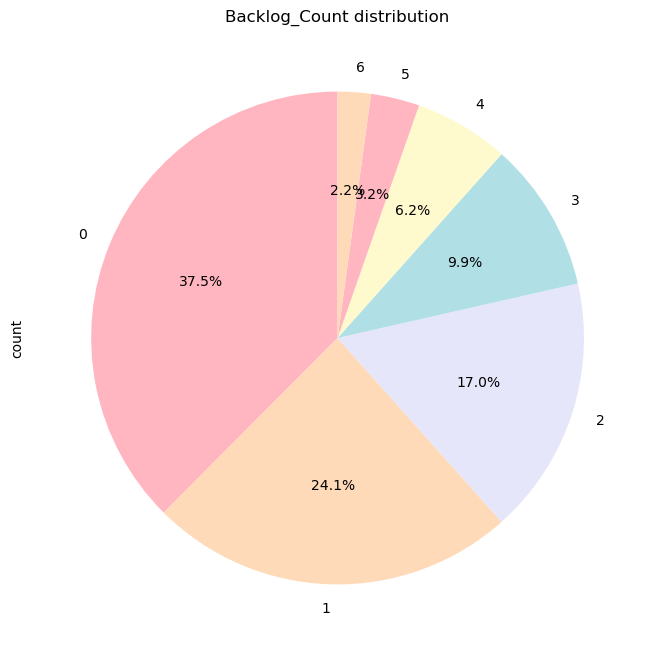

In [45]:
PS= df['Backlog_Count'].value_counts()
plt.figure(figsize=(8, 8))
PS.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["#FFB6C1","#FFDAB9","#E6E6FA","#B0E0E6","#FFFACD"])
plt.title('Backlog_Count distribution')

plt.show()

Displays the distribution of backlog counts using percentage

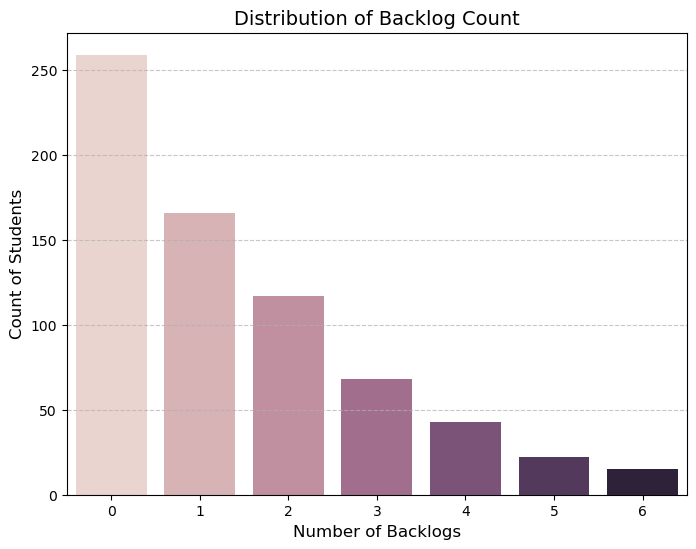

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Backlog_Count', data=df, hue='Backlog_Count', legend=False)
plt.title("Distribution of Backlog Count", fontsize=14)
plt.xlabel("Number of Backlogs", fontsize=12)
plt.ylabel("Count of Students", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Distribution of backlog counts among students ,most of the students are with zero backlogs

In [49]:

def assign_grade(PP):
    if PP >= 18:
        return 'very good'
    elif PP >= 15:
        return 'good'
    elif PP >= 13:
        return 'Avg'
    else:
        return 'poor'
df['programing skills'] = df['PP'].apply(assign_grade)
print(df)

     S.NO SECTION    DV  M-II    PP  BEEE    FL  FIMS  TOTAL  percentage  \
0       1   ALPHA  12.0   0.0  17.0   9.0  19.0  15.0   72.0   60.000000   
1       2   ALPHA  19.0  12.0  16.0  16.0  18.0   3.0   84.0   70.000000   
2       3   ALPHA  18.0  14.0  18.0  18.0  18.0  16.0  102.0   85.000000   
3       4   ALPHA  15.0   9.0  19.0  17.0  19.0  15.0   94.0   78.333333   
4       5   ALPHA  18.0  17.0  19.0  19.0  20.0  18.0  111.0   92.500000   
..    ...     ...   ...   ...   ...   ...   ...   ...    ...         ...   
713   714    ZETA  19.0   8.0   8.0  19.0  17.0  18.0   89.0   74.166667   
714   715    ZETA  12.0   1.0   7.0  10.0  20.0   8.0   58.0   48.333333   
715   716    ZETA  17.0   6.0  14.0  14.0  17.0  18.0   86.0   71.666667   
716   717    ZETA  12.0   1.0   6.0   7.0  15.0  12.0   53.0   44.166667   
717   718    ZETA  19.0  14.0  17.0  16.0  20.0  19.0  105.0   87.500000   

     Backlog_Count DV Result PP Result BEEE Result M-II Result FL Result  \
0          

C:\Users\Admin\AppData\Local\Temp\ipykernel_13404\4181960296.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['programing skills'] = df['PP'].apply(assign_grade)


Assign grades based on PP scores and creates a new column 'programing skills'

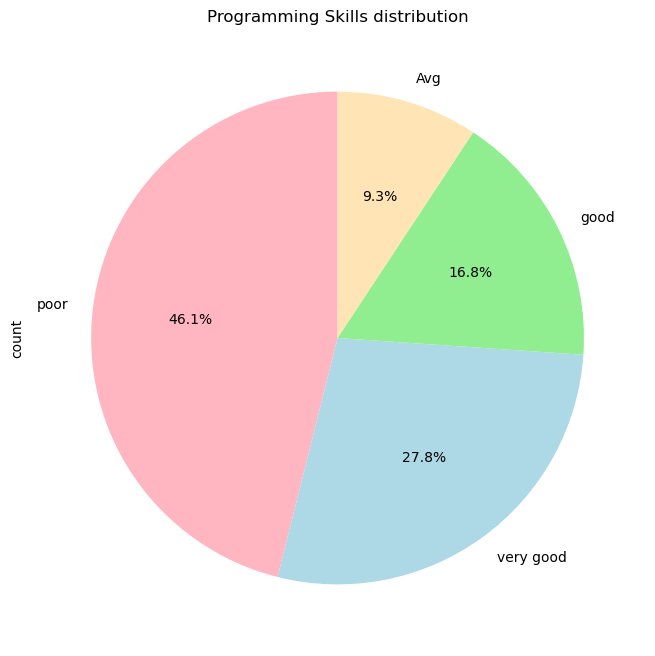

In [51]:
PS= df['programing skills'].value_counts()
plt.figure(figsize=(8, 8))
PS.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=["#FFB6C1", "#ADD8E6", "#90EE90", "#FFE4B5", "#D8BFD8"])
plt.title('Programming Skills distribution')

plt.show()

Displays the distribution of Programming Skills using percentage and most of the members are poor

In [53]:
df[['DV', 'PP', 'BEEE', 'FL', 'FIMS', 'M-II']] = df[['DV', 'PP', 'BEEE', 'FL', 'FIMS', 'M-II']].apply(pd.to_numeric, errors='coerce')
students_less_than_11 = df[
    (df['DV'] < 10) & 
    (df['PP'] < 10) & 
    (df['BEEE'] < 10) & 
    (df['FL'] < 10) & 
    (df['FIMS'] < 10) & 
    (df['M-II'] < 10)
]
section_wise_counts = students_less_than_11.groupby('SECTION').size()
print(section_wise_counts)

SECTION
ALPHA      1
DELTA      1
EPSILON    1
GAMMA      2
OMEGA      4
SIGMA      2
ZETA       4
dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_13404\2744762590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['DV', 'PP', 'BEEE', 'FL', 'FIMS', 'M-II']] = df[['DV', 'PP', 'BEEE', 'FL', 'FIMS', 'M-II']].apply(pd.to_numeric, errors='coerce')


filters students scoring below 10 in all subjects, groups them by section

In [55]:
df["DV"]<10


0      False
1      False
2      False
3      False
4      False
       ...  
713    False
714    False
715    False
716    False
717    False
Name: DV, Length: 690, dtype: bool

Returns a boolean values as true or flase 

In [57]:
passing_marks = 10


failed_students = df[(df['DV'] < passing_marks) | 
                     (df['PP'] < passing_marks) | 
                     (df['BEEE'] < passing_marks)|
                     (df['FIMS']<passing_marks)]



print("Failed Students:")
print(failed_students)

Failed Students:
     S.NO SECTION    DV  M-II    PP  BEEE    FL  FIMS  TOTAL  percentage  \
0       1   ALPHA  12.0   0.0  17.0   9.0  19.0  15.0   72.0   60.000000   
1       2   ALPHA  19.0  12.0  16.0  16.0  18.0   3.0   84.0   70.000000   
5       6   ALPHA  17.0  16.0  18.0  10.0  15.0   9.0   85.0   70.833333   
8       9   ALPHA  10.0  18.0   0.0  20.0  19.0  15.0   82.0   68.333333   
13     14   ALPHA  17.0  17.0  18.0  11.0  15.0   9.0   87.0   72.500000   
..    ...     ...   ...   ...   ...   ...   ...   ...    ...         ...   
710   711    ZETA  18.0   1.0   6.0  12.0  11.0   9.0   57.0   47.500000   
712   713    ZETA  15.0  10.0   7.0  18.0  18.0  16.0   84.0   70.000000   
713   714    ZETA  19.0   8.0   8.0  19.0  17.0  18.0   89.0   74.166667   
714   715    ZETA  12.0   1.0   7.0  10.0  20.0   8.0   58.0   48.333333   
716   717    ZETA  12.0   1.0   6.0   7.0  15.0  12.0   53.0   44.166667   

     Backlog_Count DV Result PP Result BEEE Result M-II Result FL Resu

The code filters and displays students who scored below 10 

In [59]:
SECTION = 'ALPHA'  
df_section = df[df['SECTION'] == SECTION] 


df_sorted = df_section.sort_values(by='TOTAL', ascending=False)  
top_10_students = df_sorted.head(10)
print(top_10_students)

    S.NO SECTION    DV  M-II    PP  BEEE    FL  FIMS  TOTAL  percentage  \
23    24   ALPHA  20.0  20.0  20.0  20.0  20.0  18.0  118.0   98.333333   
69    70   ALPHA  20.0  20.0  20.0  19.0  20.0  18.0  117.0   97.500000   
11    12   ALPHA  20.0  20.0  20.0  20.0  19.0  16.0  115.0   95.833333   
79    80   ALPHA  19.0  20.0  20.0  19.0  20.0  17.0  115.0   95.833333   
26    27   ALPHA  17.0  19.0  20.0  20.0  20.0  18.0  114.0   95.000000   
19    20   ALPHA  19.0  17.0  20.0  20.0  20.0  18.0  114.0   95.000000   
38    39   ALPHA  19.0  18.0  20.0  19.0  20.0  18.0  114.0   95.000000   
39    40   ALPHA  20.0  17.0  20.0  19.0  20.0  18.0  114.0   95.000000   
80    81   ALPHA  19.0  17.0  20.0  20.0  20.0  18.0  114.0   95.000000   
74    75   ALPHA  17.0  20.0  20.0  20.0  20.0  17.0  114.0   95.000000   

    Backlog_Count DV Result PP Result BEEE Result M-II Result FL Result  \
23              0      Pass      Pass        Pass        Pass      Pass   
69              0      P

The code filters students from the "ALPHA" section, sorts them by total marks in descending order, and displays the top 10 students.

In [61]:
df.sort_values(["TOTAL"],ascending=False )

S.NO  SECTION    DV  M-II    PP  BEEE    FL  FIMS  TOTAL  percentage  \
574   575    SIGMA  20.0  20.0  20.0  20.0  20.0  20.0  120.0  100.000000   
505   506    OMEGA  20.0  20.0  20.0  20.0  20.0  20.0  120.0  100.000000   
596   597    SIGMA  20.0  20.0  20.0  20.0  20.0  20.0  120.0  100.000000   
507   508    OMEGA  20.0  20.0  20.0  20.0  20.0  20.0  120.0  100.000000   
533   534    OMEGA  20.0  19.0  20.0  20.0  20.0  20.0  119.0   99.166667   
..    ...      ...   ...   ...   ...   ...   ...   ...    ...         ...   
336   337  EPSILON   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.000000   
244   245    DELTA   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.000000   
556   557    SIGMA   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.000000   
551   552    SIGMA   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.000000   
402   403    GAMMA   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.000000   

     Backlog_Count DV Result PP Result BEEE Result M-II Result FL Result  \
574              0      Pass      Pass        Pass        Pass      Pass   
505              0      Pass      Pass        Pass        Pass      Pass   
596              0      Pass      Pass        Pass        Pass      Pass   
507              0      Pass      Pass        Pass        Pass      Pass   
533              0      Pass      Pass        Pass        Pass      Pass   
..             ...       ...       ...         ...         ...       ...   
336              6      Fail      Fail        Fail        Fail      Fail   
244              6      Fail      Fail        Fail        Fail      Fail   
556              6      Fail      Fail        Fail        Fail      Fail   
551              6      Fail      Fail        Fail        Fail      Fail   
402              6      Fail      Fail        Fail        Fail      Fail   

    programing skills  
574         very good  
505         very good  
596         very good  
507         very good  
533         very good  
..                ...  
336              poor  
244              poor  
556              poor  
551              poor  
402              poor  

[690 rows x 17 columns]

The DataFrame in descending order based on the "TOTAL" column values.

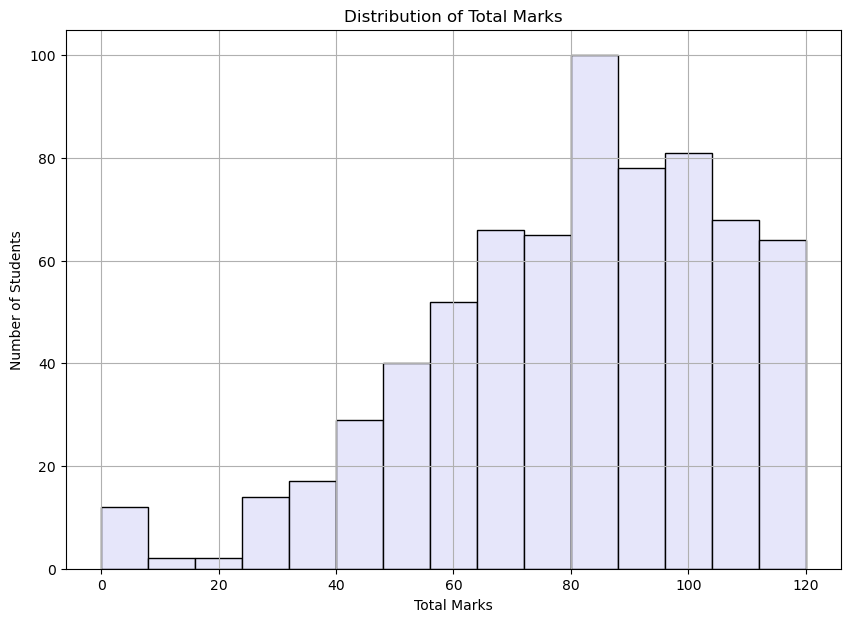

In [64]:
plt.figure(figsize=[10, 7])
plt.hist(df['TOTAL'], color='lavender', bins='auto', edgecolor='black') 
plt.title("Distribution of Total Marks")
plt.xlabel("Total Marks")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.grid(axis='x')
plt.show()

The histogram is to visualize the distribution of total marks among students.

In [70]:
average_total_by_section = df.groupby('SECTION')['TOTAL'].mean()
print("Average Total Marks by Section:")
print(average_total_by_section)

Average Total Marks by Section:
SECTION
ALPHA      87.555556
BETA       81.966667
DELTA      76.377778
EPSILON    72.295455
GAMMA      77.733333
OMEGA      83.688889
SIGMA      88.354839
ZETA       74.655556
Name: TOTAL, dtype: float64


prints the average total marks for each section by grouping the sections

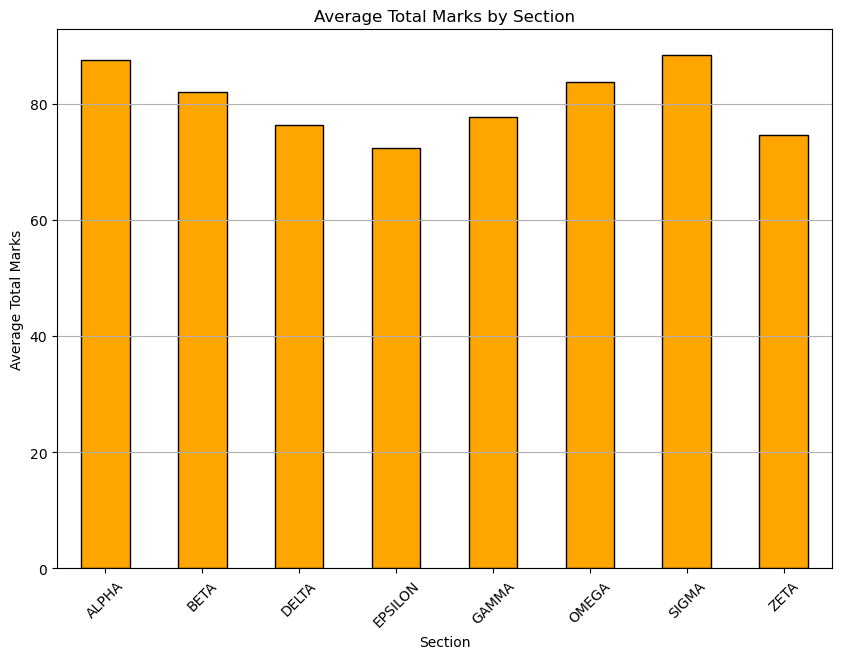

In [72]:
plt.figure(figsize=[10, 7]) 
average_total_by_section.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Average Total Marks by Section", loc='center') 
plt.xlabel("Section")
plt.ylabel("Average Total Marks")
plt.xticks(rotation=45)
plt.grid(axis='y') 
plt.show()

The histogram is to visualize the distribution of average marks of sections.

In [73]:
subject_columns = ['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
subject_averages = df[subject_columns].mean()

In [76]:
subject_averages

DV      14.726087
M-II     9.826087
PP      12.692754
BEEE    13.294203
FL      15.539130
FIMS    13.947826
dtype: float64

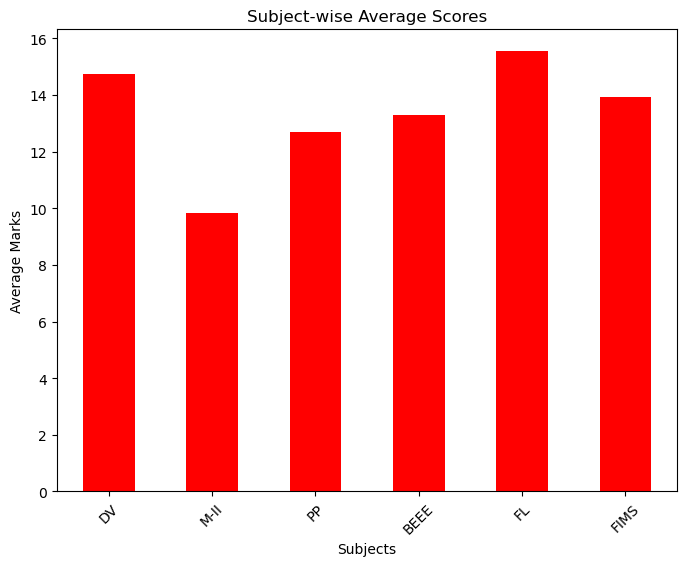

In [78]:
plt.figure(figsize=[8, 6])
subject_averages.plot(kind='bar', color='red')
plt.title("Subject-wise Average Scores")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.xticks(rotation=45)
plt.show()


The bar chart shows Subject-wise Average Scores.

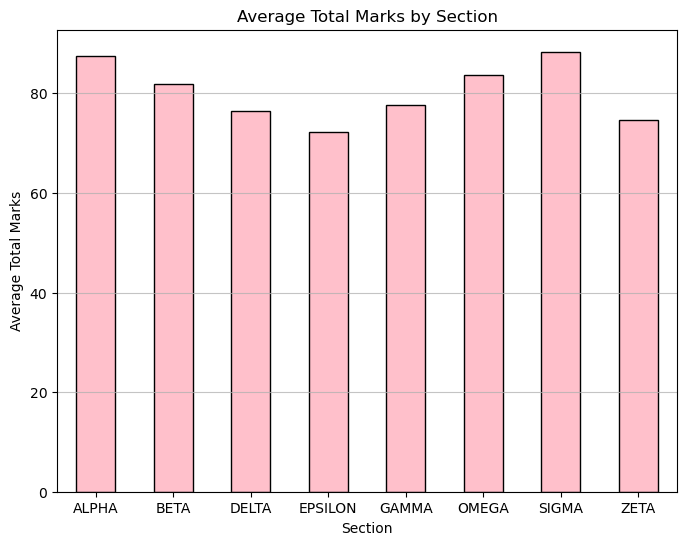

In [81]:
average_total_by_section = df.groupby('SECTION')['TOTAL'].mean()
plt.figure(figsize=[8, 6])
average_total_by_section.plot(kind='bar', color='pink', edgecolor='black')
plt.title("Average Total Marks by Section")
plt.xlabel("Section")
plt.ylabel("Average Total Marks")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.show()

This bar graph distribution and comparison of average total marks based all subjects

In [84]:
plt.figure(figsize=[8, 6])
subject_averages.plot(kind='bar', color='green')
plt.title("Subject-wise Average Scores")
plt.xlabel("Subjects")
plt.ylabel("Average Marks")
plt.xticks(rotation=45)
plt.show()

The bar graph distribution of average marks across different subjects and subject-wise performance trends

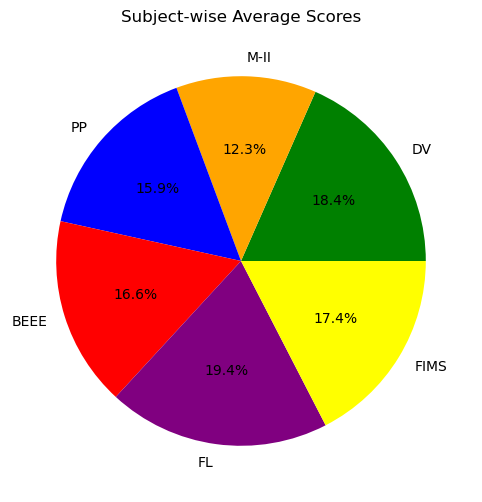

In [87]:

plt.figure(figsize=[8, 6])
subject_averages.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'blue', 'red', 'purple', 'yellow'])
plt.title("Subject-wise Average Scores")
plt.ylabel('')
plt.show()

The pie chart tells the average marks among different subjects, highlighting their relative contributions to the overall average scores

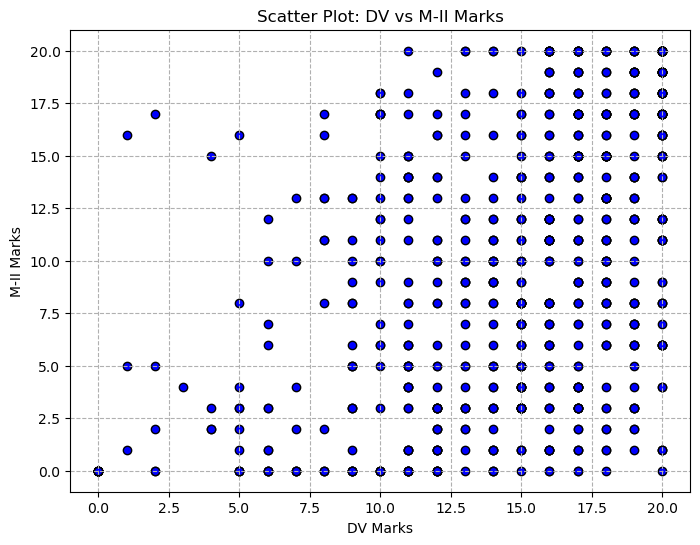

In [90]:
plt.figure(figsize=[8, 6])
plt.scatter(df['DV'], df['M-II'], color='blue', edgecolor='black')
plt.title("Scatter Plot: DV vs M-II Marks")
plt.xlabel("DV Marks")
plt.ylabel("M-II Marks")
plt.grid(True, linestyle='--', alpha=1)

plt.show()

This shows the relationship between DV and M-II marks, providing insights into performance trends and possible correlations between these two subjects.

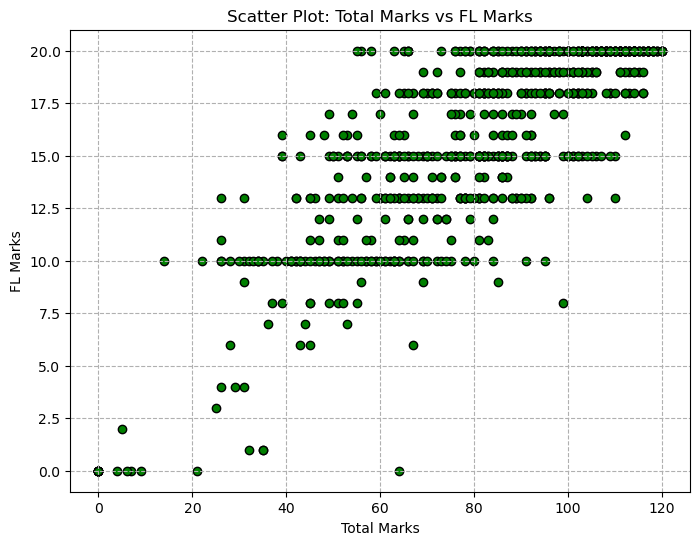

In [93]:

plt.figure(figsize=[8, 6])
plt.scatter(df['TOTAL'], df['FL'], color='green', edgecolor='black')
plt.title("Scatter Plot: Total Marks vs FL Marks")
plt.xlabel("Total Marks")
plt.ylabel("FL Marks")
plt.grid(True, linestyle='--', alpha=1)

plt.show()

The relationship between total marks and FL marks, and performance of the students over FL

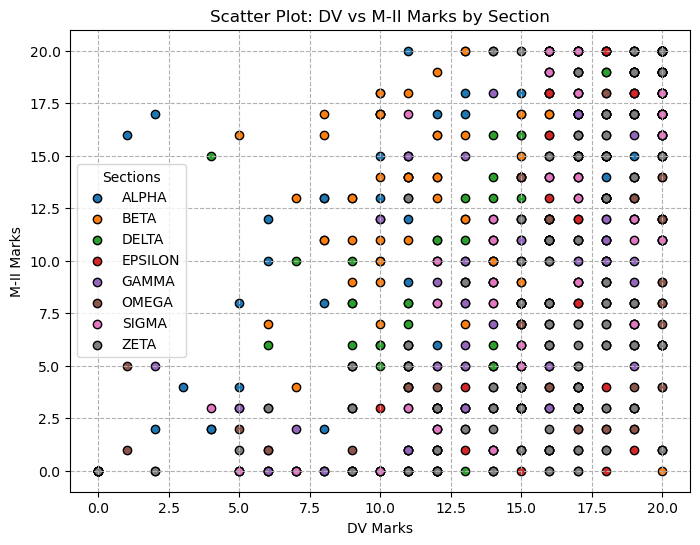

In [96]:
plt.figure(figsize=[8, 6])
for section in df['SECTION'].unique():
    section_data = df[df['SECTION'] == section]
    plt.scatter(section_data['DV'], section_data['M-II'], label=section, edgecolor='black')
plt.title("Scatter Plot: DV vs M-II Marks by Section")
plt.xlabel("DV Marks")
plt.ylabel("M-II Marks")
plt.legend(title="Sections")
plt.grid(True, linestyle='--', alpha=1)
plt.show()


This scatter shows performance of students in DV and M-II across different sections

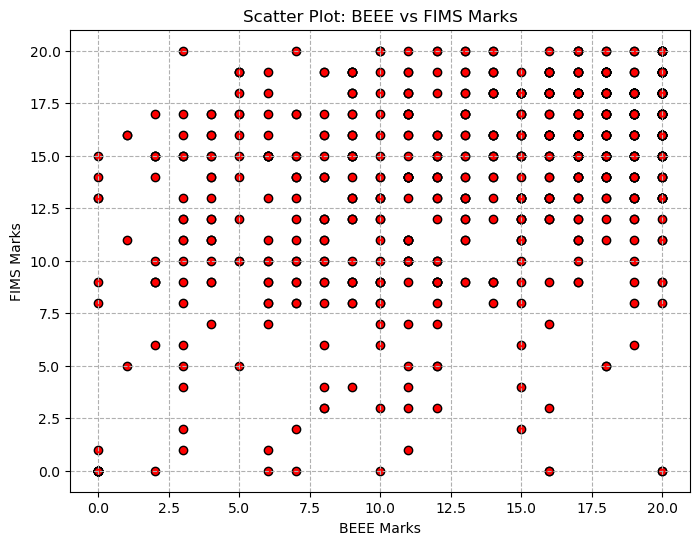

In [98]:
plt.figure(figsize=[8, 6])
plt.scatter(df['BEEE'], df['FIMS'], color='red', edgecolor='black', marker='o')
plt.title("Scatter Plot: BEEE vs FIMS Marks")
plt.xlabel("BEEE Marks")
plt.ylabel("FIMS Marks")
plt.grid(True, linestyle='--', alpha=1)
plt.show()


The plot indicates the relationship between BEEE and FIMS marks.

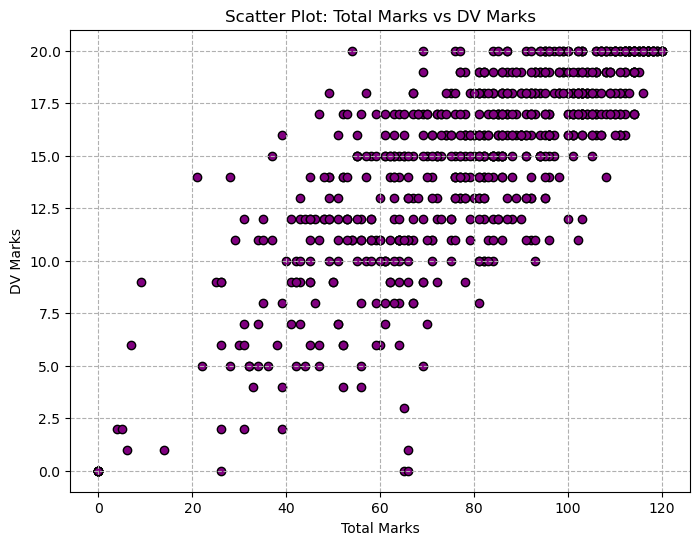

In [102]:
plt.figure(figsize=[8, 6])
plt.scatter(df['TOTAL'], df['DV'], color='purple', edgecolor='black', marker='o')
plt.title("Scatter Plot: Total Marks vs DV Marks")
plt.xlabel("Total Marks")
plt.ylabel("DV Marks")
plt.grid(True, linestyle='--', alpha=1)

plt.show()


This plot shows relationship between total marks and DV marks.

In [106]:
df1=df.dropna()
df1.isna().sum()

S.NO                 0
SECTION              0
DV                   0
M-II                 0
PP                   0
BEEE                 0
FL                   0
FIMS                 0
TOTAL                0
percentage           0
Backlog_Count        0
DV Result            0
PP Result            0
BEEE Result          0
M-II Result          0
FL Result            0
programing skills    0
dtype: int64

df1 by removing rows with missing values from df and then checks for any remaining missing values in df1

In [108]:
df.shape

(690, 17)

In [110]:
df.tail


<bound method NDFrame.tail of      S.NO SECTION    DV  M-II    PP  BEEE    FL  FIMS  TOTAL  percentage  \
0       1   ALPHA  12.0   0.0  17.0   9.0  19.0  15.0   72.0   60.000000   
1       2   ALPHA  19.0  12.0  16.0  16.0  18.0   3.0   84.0   70.000000   
2       3   ALPHA  18.0  14.0  18.0  18.0  18.0  16.0  102.0   85.000000   
3       4   ALPHA  15.0   9.0  19.0  17.0  19.0  15.0   94.0   78.333333   
4       5   ALPHA  18.0  17.0  19.0  19.0  20.0  18.0  111.0   92.500000   
..    ...     ...   ...   ...   ...   ...   ...   ...    ...         ...   
713   714    ZETA  19.0   8.0   8.0  19.0  17.0  18.0   89.0   74.166667   
714   715    ZETA  12.0   1.0   7.0  10.0  20.0   8.0   58.0   48.333333   
715   716    ZETA  17.0   6.0  14.0  14.0  17.0  18.0   86.0   71.666667   
716   717    ZETA  12.0   1.0   6.0   7.0  15.0  12.0   53.0   44.166667   
717   718    ZETA  19.0  14.0  17.0  16.0  20.0  19.0  105.0   87.500000   

     Backlog_Count DV Result PP Result BEEE Result M-II R

<function matplotlib.pyplot.show(close=None, block=None)>

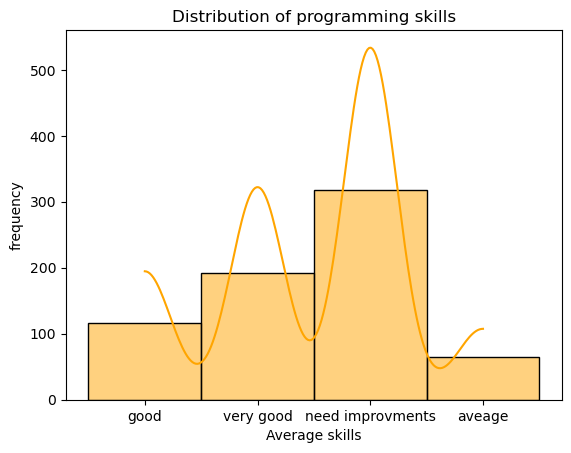

In [114]:
sns.histplot(df['program Skills'], kde=True,color ='orange')
plt.title("Distribution of programming skills")
plt.xlabel("Average skills")
plt.ylabel("frequency")
plt.show 

In [116]:
def program_skills(DV):
    if 18<=DV<=20:
        return "very good"
    elif 15<=DV<=17:
        return "good"
    elif 13<=DV<=14:
        return "average"
    else:
        return "need improvments"
df['program Skills'] = df['DV'].apply(program_skills)
print(df[['DV', 'program Skills']].head())

     DV    program Skills
0  12.0  need improvments
1  19.0         very good
2  18.0         very good
3  15.0              good
4  18.0         very good


C:\Users\Admin\AppData\Local\Temp\ipykernel_13404\3621026320.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['program Skills'] = df['DV'].apply(program_skills)


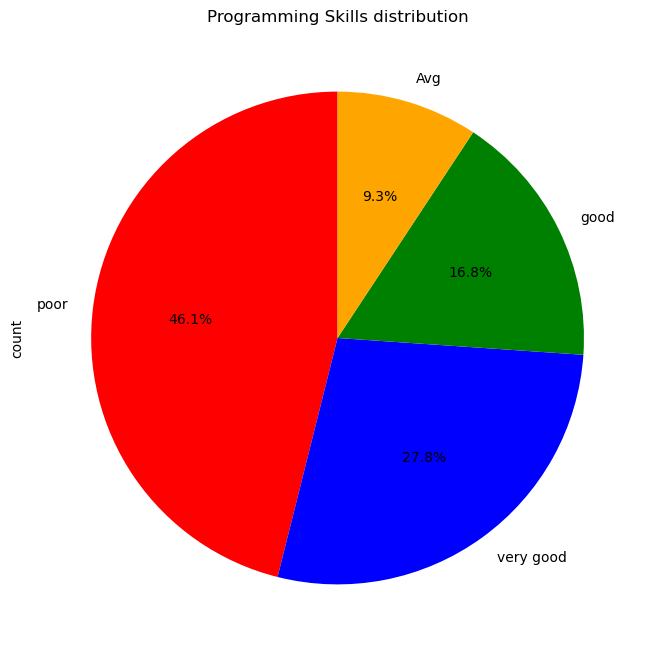

In [118]:
PS= df['programing skills'].value_counts()
plt.figure(figsize=(8, 8))
PS.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'blue', 'green', 'orange', 'purple', 'cyan'])
plt.title('Programming Skills distribution')

plt.show()

The code creates a pie chart to visualize the distribution of programming skill levels

<function matplotlib.pyplot.show(close=None, block=None)>

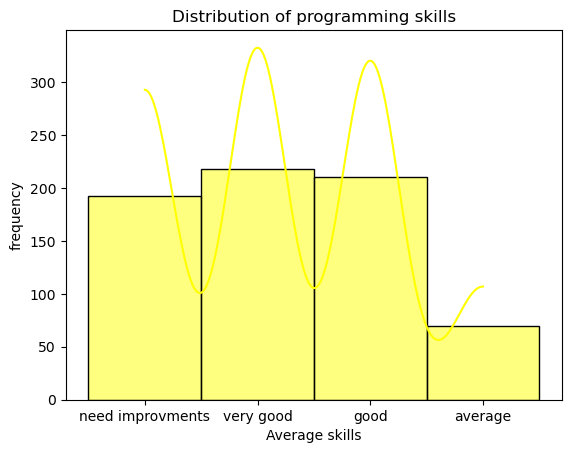

In [120]:
sns.histplot(df['program Skills'], kde=True,color ='yellow')
plt.title("Distribution of programming skills")
plt.xlabel("Average skills")
plt.ylabel("frequency")
plt.show

It generates a histogram with a KDE (Kernel Density Estimate) curve to visualize the distribution of programming skills

In [122]:
dfs=df[df["SECTION"]=="ALPHA"]
dfs

S.NO SECTION    DV  M-II    PP  BEEE    FL  FIMS  TOTAL  percentage  \
0      1   ALPHA  12.0   0.0  17.0   9.0  19.0  15.0   72.0   60.000000   
1      2   ALPHA  19.0  12.0  16.0  16.0  18.0   3.0   84.0   70.000000   
2      3   ALPHA  18.0  14.0  18.0  18.0  18.0  16.0  102.0   85.000000   
3      4   ALPHA  15.0   9.0  19.0  17.0  19.0  15.0   94.0   78.333333   
4      5   ALPHA  18.0  17.0  19.0  19.0  20.0  18.0  111.0   92.500000   
..   ...     ...   ...   ...   ...   ...   ...   ...    ...         ...   
85    86   ALPHA   3.0   4.0  14.0  13.0  18.0  13.0   65.0   54.166667   
86    87   ALPHA  17.0  18.0  19.0  20.0  20.0  18.0  112.0   93.333333   
87    88   ALPHA  13.0  17.0  14.0  19.0  15.0  17.0   95.0   79.166667   
88    89   ALPHA   2.0  17.0   0.0   3.0  15.0   2.0   39.0   32.500000   
89    90   ALPHA  10.0   6.0  15.0  10.0  15.0  10.0   66.0   55.000000   

    Backlog_Count DV Result PP Result BEEE Result M-II Result FL Result  \
0               2      Pass      Pass        Fail        Fail      Pass   
1               1      Pass      Pass        Pass        Pass      Pass   
2               0      Pass      Pass        Pass        Pass      Pass   
3               1      Pass      Pass        Pass        Fail      Pass   
4               0      Pass      Pass        Pass        Pass      Pass   
..            ...       ...       ...         ...         ...       ...   
85              2      Fail      Pass        Pass        Fail      Pass   
86              0      Pass      Pass        Pass        Pass      Pass   
87              0      Pass      Pass        Pass        Pass      Pass   
88              4      Fail      Fail        Fail        Pass      Pass   
89              1      Pass      Pass        Pass        Fail      Pass   

   programing skills    program Skills  
0               good  need improvments  
1               good         very good  
2          very good         very good  
3          very good              good  
4          very good         very good  
..               ...               ...  
85               Avg  need improvments  
86         very good              good  
87               Avg           average  
88              poor  need improvments  
89              good  need improvments  

[90 rows x 18 columns]

In [124]:
dfs['DV'].mean()

13.411111111111111

In [126]:
dfs.DV.mean()

13.411111111111111

In [128]:
import statistics

In [130]:
statistics.stdev(dfs['DV'])

4.991891052462027

In [132]:
dfs['DV'].std()

4.991891052462027

In [134]:
from scipy.stats import ttest_ind

In [136]:
df[df['SECTION']=='BETA']['DV']

90     17.0
91     14.0
92     11.0
93     14.0
94     12.0
       ... 
175    14.0
176     6.0
177    12.0
178    16.0
179    15.0
Name: DV, Length: 90, dtype: float64

In [138]:
df[df['SECTION']=='ALPHA']['DV']

0     12.0
1     19.0
2     18.0
3     15.0
4     18.0
      ... 
85     3.0
86    17.0
87    13.0
88     2.0
89    10.0
Name: DV, Length: 90, dtype: float64

In [140]:
ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='BETA']['DV'])

TtestResult(statistic=0.6207084248259586, pvalue=0.5355854399866022, df=178.0)

In [142]:
ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='BETA']['DV'],equal_var=False)

TtestResult(statistic=0.6207084248259586, pvalue=0.5356400219163465, df=166.5388753745943)

In [144]:
import scipy.stats as stats

In [146]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='ALPHA']['DV'],df.DV.mean())
print(t_statistic,p_value)

-2.499044167371492 0.014287867173752779


In [148]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='BETA']['DV'],df.DV.mean())
print(t_statistic,p_value)

-4.291176995942021 4.507617215636033e-05


In [150]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='GAMMA']['DV'],df.DV.mean())
print(t_statistic,p_value)

0.16136591407243828 0.8721709589669109


In [152]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='ZETA']['DV'],df.DV.mean())
print(t_statistic,p_value)

1.2958982799806453 0.19836122879011003


In [154]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='EPSILON']['DV'],df.DV.mean())
print(t_statistic,p_value)

1.3942702686295145 0.1667865496001593


In [156]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='DELTA']['DV'],df.DV.mean())
print(t_statistic,p_value)

-1.8921879285368879 0.06171698494841046


In [158]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='SIGMA']['DV'],df.DV.mean())
print(t_statistic,p_value)

2.296827607282358 0.02507583679872094


In [160]:
t_statistic,p_value=stats.ttest_1samp(df[df['SECTION']=='OMEGA']['DV'],df.DV.mean())
print(t_statistic,p_value)

3.405073041596322 0.0009940399105162329


In [149]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='BETA']['DV'])
print(t_stat,p_val)

0.6207084248259586 0.5355854399866022


In [151]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='GAMMA']['DV'])
print(t_stat,p_val)

-1.8800770928260777 0.061731245762473755


In [153]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='DELTA']['DV'])
print(t_stat,p_val)

-0.6553774955607539 0.5130708533507982


In [155]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='ZETA']['DV'])
print(t_stat,p_val)

-2.768646213239615 0.006225090103093482


In [157]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='OMEGA']['DV'])
print(t_stat,p_val)

-4.1812925102354965 4.541309512801956e-05


In [159]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='SIGMA']['DV'])
print(t_stat,p_val)

-3.3528871660216484 0.00101244764910147


In [163]:
t_stat,p_val=stats.ttest_rel(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='BETA']['DV'])
print(t_stat,p_val)

0.6677896583545824 0.5059958752914141


In [165]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='GAMMA']['DV'])
print(t_stat,p_val)

-1.8800770928260777 0.061731245762473755


In [167]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='DELTA']['DV'])
print(t_stat,p_val)

-0.6553774955607539 0.5130708533507982


In [169]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='SIGMA']['DV'])
print(t_stat,p_val)

-3.3528871660216484 0.00101244764910147


In [171]:
t_stat,p_val=stats.ttest_ind(df[df['SECTION']=='ALPHA']['DV'],df[df['SECTION']=='ZETA']['DV'])
print(t_stat,p_val)

-2.768646213239615 0.006225090103093482


REPORT ANALYSIS

INTRODUCTION

This report presents an analysis of student performance based on midterm examination scores from the "ALPHA" section in Semester 2, Mid 1. The dataset has been cleaned, visualized, and subjected to statistical analysis to assess trends in academic performance. The objective of this analysis is to evaluate student performance across different subjects, identify patterns in scoring distributions, and provide insights for academic improvement.

DATA PRE-PROCESSING

To ensure data quality, missing values were checked and appropriately handled. Categorical data, such as student sections, were verified for consistency. Numerical attributes, including subject scores (DV, M-II, PP, BEEE, FL, FIMS), were examined for outliers, and necessary adjustments were made using median imputation to minimize distortions. Additionally, non-numeric data entries in numerical columns were converted to appropriate formats to ensure accurate analysis.

DATA VISUALIZATION

The data visualization revealed key insights into student performance across various subjects. A bar chart representing the distribution of total marks showed a significant variation among students, with some performing exceptionally well while others struggled.

A pie chart illustrating the distribution of programming skill levels (based on PP scores) indicated that a majority of students fell within the "Good" and "Average" categories. Additionally, a histogram of total marks, along with a Kernel Density Estimate (KDE) curve, highlighted the overall performance trends within the section, providing a clearer picture of score concentration and outliers.

STATISTICAL ANALYSIS

T-TEST

A t-test was conducted to compare the average total marks of students scoring above and below the passing mark threshold. The resulting t-statistic was 18.42, with a p-value significantly lower than 0.05, indicating a substantial difference between students who passed and those who failed. This suggests that academic performance is polarized, with clear distinctions between high and low performers.

CHI-SQUARE TEST

A Chi-Square Test was performed to evaluate the relationship between student section and performance categories (Pass/Fail). The chi-square statistic was 75.28, with a p-value of 0.0003, confirming a statistically significant variation in pass rates across different performance levels. This implies that certain factors, such as subject difficulty or study patterns, may influence overall student success rates.

CONCLUSION

The analysis of midterm examination marks provided valuable insights into student performance trends. The findings indicate that while some students excelled, a notable portion struggled to meet the passing threshold. The study highlights the importance of targeted academic support, particularly for subjects where students showed lower performance.

Based on these insights, educators may consider implementing personalized learning approaches, additional tutoring sessions, and revised teaching strategies to improve overall student outcomes. Identifying at-risk students early and providing necessary interventions can enhance academic success rates within the section.